# EE16A Homework 12

## Question 1: Labeling Patients Using Gene Expression Data

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


### Part (b)

In [3]:
A = np.load('gene_data_train.npy')
b = np.load('diabetes_train.npy')

# YOUR CODE HERE
inverse = np.linalg.inv(np.dot(transpose(A), A))
intermediate = np.dot(inverse, transpose(A))
x = np.dot(intermediate, b)
print(x)

[[-0.15646169]
 [ 0.09239418]
 [ 0.48053974]
 [-0.5847018 ]
 [-0.35350734]]


### Part (c)

In [4]:
A_test = np.load('gene_data_test.npy')
b_test = np.load('diabetes_test.npy')

# YOUR CODE HERE
result = np.dot(A_test, x)
print(result)

[[ 0.02743822]
 [-0.30439161]
 [-1.24077589]
 [ 1.9307863 ]]


## Question 2: The Framingham Risk Score

In [5]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Part (a)

In [8]:
# Importing medical data
import scipy.io

# LOADS IN THE MEDICAL DATA IN THE FORM OF A PYTHON DICTIONARY.
# Data credit: CDC (https://www.cdc.gov/nchs/nhanes/index.htm)
data = scipy.io.loadmat('CVDdata.mat')

#UNPACKING DATA INTO COLUMN VECTORS
AGE = data['AGE']
TC = data['TC']
HDL = data['HDL']
SBP = data['SBP']
DIA = data['DIABETIC']
SMK = data['SMOKER']
p = data['pNoisy']

# Write expressions for b, A1, A2, A3, A4, A5, A6
# It will help to use the identity log_n(z) = log(z)/log(n)

b = np.log(np.log(1-p)/np.log(0.95)) + 26.1931

A1 = np.log(AGE)
A2 = np.log(TC)
A3 = np.log(HDL)
A4 = np.log(SBP)
A5 = DIA
A6 = SMK

### Part (b)

In [9]:
# Write expressions for b and A
# The function np.hstack will be helpful for constructing A
b = b
A = np.hstack([A1, A2, A3, A4, A5, A6])

### Part (c)

In [11]:
# Write an expression for xhat

xhat = np.dot(np.dot(np.linalg.inv(np.dot(transpose(A), A)),np.transpose(A)),b)

print("The estimated values for x are xhat = " + str(xhat.T))

The estimated values for x are xhat = [[ 2.34335592  1.24071471 -0.66932531  2.68487652  0.70535101  0.513298  ]]


### Part (d)

In [14]:
# the model estimate bhat, and the squared error e2
bhat = np.dot(A, xhat)
e2 = pow(np.linalg.norm(bhat-b), 2)

print("The model's prediction of b is " + str(bhat))
print("The sum of squared errors is " + str(e2))

The model's prediction of b is [[ 26.21252989]
 [ 27.41117879]
 [ 27.43500704]
 [ 25.80504015]
 [ 26.12504356]
 [ 26.68006468]
 [ 27.16772057]
 [ 27.14764991]
 [ 25.65622405]
 [ 27.06394375]
 [ 25.810169  ]
 [ 26.60174108]
 [ 26.67892168]
 [ 26.8477063 ]
 [ 26.29821874]
 [ 26.8532765 ]
 [ 26.14235821]
 [ 25.37868019]
 [ 28.80243351]
 [ 24.9265512 ]
 [ 26.77380536]
 [ 27.46423111]
 [ 26.69602829]
 [ 26.77839187]
 [ 26.21502015]
 [ 26.25134401]
 [ 27.22971296]
 [ 26.94461791]
 [ 25.75207362]
 [ 27.46650623]
 [ 26.58845411]
 [ 27.37647175]
 [ 26.75333685]
 [ 25.65488896]
 [ 26.00517592]
 [ 25.06830367]
 [ 24.97375723]
 [ 26.13730247]
 [ 26.39981879]
 [ 26.8552638 ]
 [ 26.21302624]
 [ 27.05720308]
 [ 28.90977223]
 [ 28.5295435 ]
 [ 27.42671455]
 [ 26.84278597]
 [ 25.4570854 ]
 [ 26.27059625]
 [ 26.51336287]
 [ 24.98110087]
 [ 26.51890134]
 [ 25.69612305]
 [ 27.51780495]
 [ 28.23845687]
 [ 27.03346501]
 [ 27.28259679]
 [ 26.91716709]
 [ 25.11079746]
 [ 25.29310842]
 [ 27.21187325]
 [ 26.320

### Part (e)

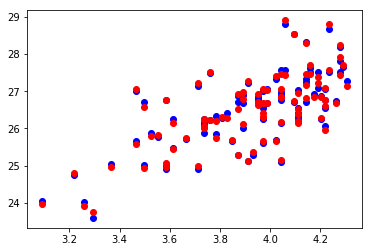

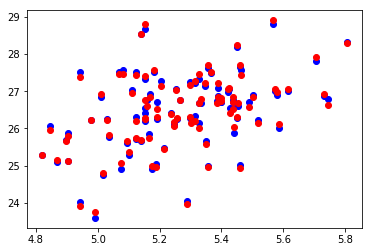

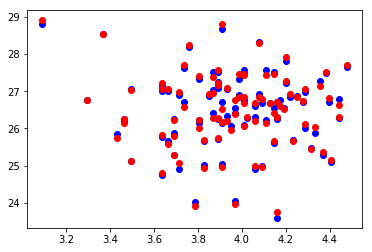

In [15]:
# Linear plots, pick an index below (0,1,2,etc). This code will plot b and bhat vs Ai
plt.figure(0)
i = 0
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],bhat,'or')

plt.figure(1)
i = 1
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],bhat,'or')

plt.figure(2)
i = 2
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],bhat,'or')

### Part (f)

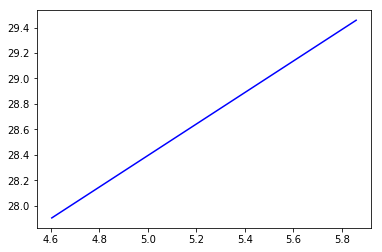

In [19]:
# Here are the values for the test plot
age_test = 40
tc_test_vector = np.linspace(100,350,(350-100+1))
hdl_test = 25
sbp_test = 220
dia_test = 1
smk_test = 1

A2_test = np.zeros(tc_test_vector.size)
b_test = np.zeros(tc_test_vector.size)

for ind in range(tc_test_vector.size):
    tc_test = tc_test_vector[ind];
    # Use the values for age_test, tc_test, hdl_test, sbp_test, dia_test
    # and smk_test to calculate the next value for b_test (y axis value)
    # and A2_test (x_axis value)
    b_test[ind] = xhat[0] * np.log(age_test) + xhat[1] * np.log(tc_test) + xhat[2] * np.log(hdl_test) + \
                  xhat[3] * np.log(sbp_test) + xhat[4] * dia_test + xhat[5] * smk_test 
    A2_test[ind] = np.log(tc_test)

plt.plot(A2_test,b_test,'-b')

### Part (g)

The sum of squared errors after perturbing is 77.1627202191


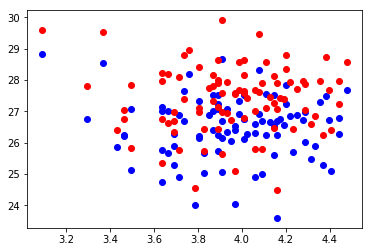

In [26]:
# Perturb xhat from the solution above, store into x_perturbed and replot.

# Use the following example expression with different pertrubations.
x_perturbed = xhat+np.matrix([.1, 0.2, 0.2, -0.3, 0.1, 0.32]).T

# What are the new estimated b values in terms of x_perturbed?
b_perturbed = np.dot(A, x_perturbed)

# Plot again
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],b_perturbed,'or')

# What is the new sum of squared errors (after perturbing)?
e2_perturbed = pow(np.linalg.norm(b-b_perturbed), 2)

print("The sum of squared errors after perturbing is " + str(e2_perturbed))

### PRACTICE: Part (h)

In [28]:
# Nonlinear plots, pick an index below (0,1,2,etc). This code will plot b and bhat vs Ai
i = 3

# Write an expression for estimated p values here
p_estimated = 

plt.plot(np.exp(A[:,i]),p,'ob')
plt.plot(np.exp(A[:,i]),p_estimated,'or')

### PRACTICE: Part (i)

In [29]:
# transform b_test into p_test
p_test =

plt.plot(tc_test_vector,p_test,'-b')